In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits.images.shape, digits.target.shape

((1797, 8, 8), (1797,))

In [3]:
digits.images[4]

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

4

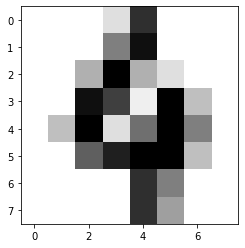

In [4]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[100], cmap=plt.cm.gray_r)
digits.target[100]

In [5]:
data_flatten = digits.images.reshape(digits.images.shape[0], -1)

data_flatten.shape

(1797, 64)

In [6]:
from sklearn.model_selection import train_test_split
data = data_flatten / 16
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.1, random_state=1)

# take the transpose
X_train = X_train.T
X_test = X_test.T

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((64, 1617), (1617,), (64, 180), (180,))

In [8]:
import numpy as np
y_train_ohe = np.zeros((10, y_train.shape[0]))
for count, y in enumerate(y_train):
    y_train_ohe[y][count] = 1

In [9]:
class NN(object): 
    def __init__(self): 
        self._w1 = None
        self._w2 = None
        self._b1 = None
        self._b2 = None
        self._dw1 = None
        self._dw2 = None
        self._db1 = None
        self._db2 = None
        self._a1 = None
        self._a2 = None
        self._x  = None

    def set_params(self, w, b):
        self._w1 = w[0]
        self._w2 = w[1]
        self._b1 = b[0]
        self._b2 = b[1]

    def init_params(self):
        self._w1 = np.random.randn(16, 64) * np.sqrt(2/64)
        self._w2 = np.random.randn(10, 16) * np.sqrt(2/16)
        self._b1 = np.zeros((16, 1))
        self._b2 = np.zeros((10, 1))
    
    def forward(self, x): 
        self._x = x
        self._z1 = np.dot(self._w1, self._x) + self._b1
        self._a1 = self._relu(self._z1)
        self._z2 = np.dot(self._w2, self._a1) + self._b2
        self._a2 = self._softmax(self._z2)
        return self._a2

    def backprop(self, y): 
        m = self._a2.shape[1]

        dz2 = self._a2 - y
        self._dw2 = 1/m * np.dot(dz2, self._a1.T)
        self._db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
        da1 = np.dot(self._w2.T, dz2)
        dz1 = np.array(da1, copy=True)
        dz1[self._z1 <= 0] = 0
        self._dw1 = 1/m * np.dot(dz1, self._x.T)
        self._db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)

    def update_grad(self, lr = 0.1):
        w1 = self._w1 - lr * self._dw1
        w2 = self._w2 - lr * self._dw2
        b1 = self._b1 - lr * self._db1
        b2 = self._b2 - lr * self._db2
        self.set_params([w1, w2], [b1, b2])

    def compute_cost(self, y):
        y_hat = np.clip(self._a2, 0.00001, 0.99999)
        loss = - np.sum(y * np.log(y_hat), axis=0)
        cost = np.mean(loss)
        cost = np.squeeze(cost)
        return cost

    def fit(self, x, y, n_iter=500, lr=0.1, cost_check=False): 
        costs = []
        for i in range(n_iter): 
            self.forward(x)
            self.backprop(y)
            self.update_grad(lr)
            if cost_check: 
                cost = self.compute_cost(y)
                costs.append(cost)
        return costs
    
    def predict(self, x): 
        y_hat = self.forward(x)
        return np.argmax(y_hat, axis=0)

    def _relu(self, x): 
        return np.maximum(0,x)  

    def _softmax(self, x): 
        exp = np.exp(x)
        return exp / exp.sum(axis=0)

    

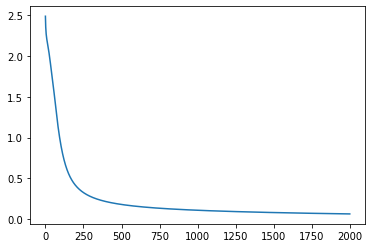

In [10]:
np.random.seed(1)

nn = NN()
nn.init_params()
costs = nn.fit(X_train, y_train_ohe, n_iter=2000, cost_check=True)

plt.plot(costs)

In [11]:
y_hat = nn.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.9666666666666667